# Exploration of the microbiota dataset

In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import src.data.dataloader as dataloader

## NIPICOL Experiment: data extraction

We have at our disposal the results of a given experiments named "NIPICOL". The experiment was conducted over 83 patients, and consists in determining the patient's health state after the study given its microbiota composition.

For the sake of anonymization, each patient name is encrypted in an id formatted as "FRA..."with 11 characters, and sometimes a "bis" annotation that is yet to be determined.

In the NIPICOL dataframe, we get the microbiota composition of the individuals in the dataset. Each column is an individual, and each row represents the proportion of a given bacteria in its composition. The rows name match the taxonomy of the bacteria specimen for which the proportion is assessed.

In the mapping dataframe, we get various annotations about each patient. Specifically, we are interested in the `best_irecist` column indicates the response of the patient to the study and forms our main interest label. `CR` signifying a complete remission, we will consider the other labels to be negative results of the study so to binarize our labels.

Hence, our goal is to predict a complete remission given the microbiota composition of each individual.

In [25]:
df = dataloader.get_NIPICOL(4, 'src/data')
df

C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\data\dataloader.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf['ASV_ID'] = rdf['ASV_ID'].str.split(f'{precisions[precision + 1]}__', n=1, expand=True)[0]


,FRA022001CA,FRA022002BB,FRA022003GA,FRA022004MC,FRA022005KF,FRA022006TS,FRA022007LP,FRA022008DM,FRA022010KI,FRA022011RB,...,FRA106001LH,FRA106003ER,FRA106004CA,FRA123001AI,FRA189001NM,FRA189002AL,FRA189004JL,FRA189005JP,FRA189010CM,FRA256001DJ
ASV_ID,,,,,,,,,,,,,,,,,,,,,
d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Actinomycetales| f__Actinomycetaceae|,0.000000,0.000000,0.000235,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000272,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000247,0.000275,0.000000
d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Bifidobacteriales| f__Bifidobacteriaceae|,0.029203,0.000150,0.000000,0.0,0.004413,0.042085,0.001818,0.166539,0.327777,0.011556,...,0.001141,0.086987,0.011556,0.190892,0.007770,0.0,0.0,0.002864,0.000446,0.043452
d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Corynebacteriales| f__Corynebacteriaceae|,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000523,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000175
d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Corynebacteriales| f__Dietziaceae|,0.000402,0.000414,0.000000,0.0,0.000000,0.000000,0.000303,0.000000,0.000241,0.000000,...,0.006683,0.000679,0.000000,0.000000,0.000000,0.0,0.0,0.001975,0.001957,0.002480
d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Micrococcales| f__Microbacteriaceae|,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000198,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Enterobacteriaceae|a0e658b68b3dda271e8617f5403542d3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002228,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Enterobacteriaceae|b54e85eefc32197ad3ce0852b2967396,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008748,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Hafniaceae|,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.021400,0.000000,0.000000,0.001780,...,0.000000,0.004198,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.011092,0.000000


In [26]:
mapping = dataloader.get_mapping_NIPICOL('src/data')
mapping

,id,numpat,Exp,timepoint,to_take,Subject_ID,irecistw12,irecistw12_tp,best_irecist,best_irecist_tp,best_irecist2,best_irecist2_tp,iPFS_progr,ipfs_time,os_time,os_event
0,FRA022001CA,FRA022-001,nipicol,S0,yes,1,SD,S0_SD,SD,S0_SD,SD,S0_SD,0,19.022587,19.055441,0
2,FRA022002BB,FRA022-002,nipicol,S0,yes,2,SD,S0_SD,PR,S0_PR,PR_CR,S0_PR_CR,0,25.494867,25.494867,0
4,FRA022003GA,FRA022-003,nipicol,S0,yes,3,SD,S0_SD,PR,S0_PR,PR_CR,S0_PR_CR,0,25.297741,25.297741,0
6,FRA022004MC,FRA022-004,nipicol,S0,yes,4,SD,S0_SD,SD,S0_SD,SD,S0_SD,1,4.501027,4.501027,1
8,FRA022005KF,FRA022-005,nipicol,S0,yes,5,PR,S0_PR,PR,S0_PR,PR_CR,S0_PR_CR,0,25.626283,25.626283,0
10,FRA022006TS,FRA022-006,nipicol,S0,yes,6,PR,S0_PR,CR,S0_CR,PR_CR,S0_PR_CR,0,25.396304,25.396304,0
12,FRA022007LP,FRA022-007,nipicol,S0,yes,7,PR,S0_PR,PR,S0_PR,PR_CR,S0_PR_CR,0,5.749487,5.880903,0
14,FRA022008DM,FRA022-008,nipicol,S0,yes,8,PR,S0_PR,PR,S0_PR,PR_CR,S0_PR_CR,0,24.837782,24.837782,0
16,FRA022010KI,FRA022-010,nipicol,S0,yes,12,SD,S0_SD,CR,S0_CR,PR_CR,S0_PR_CR,0,25.034908,25.034908,0
18,FRA022011RB,FRA022-011,nipicol,S0,yes,13,PR,S0_PR,PR,S0_PR,PR_CR,S0_PR_CR,0,24.804928,24.804928,0


From these raw data we will conceive our data matrix `X` and the labels `y`.

In [27]:
X = df.transpose()
X.columns = df.transpose().columns.tolist()[:]
X = X.astype(np.float64)
X

,d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Actinomycetales| f__Actinomycetaceae|,d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Bifidobacteriales| f__Bifidobacteriaceae|,d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Corynebacteriales| f__Corynebacteriaceae|,d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Corynebacteriales| f__Dietziaceae|,d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Micrococcales| f__Microbacteriaceae|,d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Micrococcales| f__Micrococcaceae|,d__Bacteria| p__Actinobacteriota| c__Coriobacteriia| o__Coriobacteriales| f__Atopobiaceae|,d__Bacteria| p__Actinobacteriota| c__Coriobacteriia| o__Coriobacteriales| f__Coriobacteriaceae|,d__Bacteria| p__Actinobacteriota| c__Coriobacteriia| o__Coriobacteriales| f__Coriobacteriales_Incertae_Sedis|,d__Bacteria| p__Actinobacteriota| c__Coriobacteriia| o__Coriobacteriales| f__Eggerthellaceae|,...,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Burkholderiales| f__Oxalobacteraceae|,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Burkholderiales| f__Sutterellaceae|,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Cardiobacteriales| f__Cardiobacteriaceae|,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Enterobacteriaceae|,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Enterobacteriaceae|4404333586add1e05fe280c5eaa5bdd2,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Enterobacteriaceae|a0e658b68b3dda271e8617f5403542d3,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Enterobacteriaceae|b54e85eefc32197ad3ce0852b2967396,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Hafniaceae|,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Pasteurellales| f__Pasteurellaceae|,d__Bacteria| p__Spirochaetota| c__Spirochaetia| o__Spirochaetales| f__Spirochaetaceae|
FRA022001CA,0.000000,0.029203,0.000000,0.000402,0.000000,0.000000,0.000000,0.001406,0.000000,0.000373,...,0.001147,0.004504,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FRA022002BB,0.000000,0.000150,0.000000,0.000414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000996,...,0.002218,0.016843,0.0,0.003929,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FRA022003GA,0.000235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064885,0.000000,0.000000,...,0.000910,0.004228,0.0,0.239137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FRA022004MC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000375,0.006144,...,0.001523,0.008941,0.0,0.009965,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FRA022005KF,0.000000,0.004413,0.000000,0.000000,0.000000,0.000501,0.000000,0.000407,0.000000,0.001252,...,0.000782,0.001596,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FRA022006TS,0.000000,0.042085,0.000000,0.000000,0.000000,0.000000,0.000000,0.012995,0.001046,0.000373,...,0.000747,0.003510,0.0,0.006834,0.000000,0.000000,0.000000,0.000000,0.005265,0.000000
FRA022007LP,0.000000,0.001818,0.000523,0.000303,0.000000,0.000000,0.000000,0.010521,0.000000,0.005426,...,0.000193,0.000000,0.0,0.000964,0.000000,0.000000,0.000000,0.021400,0.000468,0.000000
FRA022008DM,0.000000,0.166539,0.000000,0.000000,0.000000,0.000000,0.000000,0.002789,0.000000,0.001738,...,0.000768,0.026396,0.0,0.306075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FRA022010KI,0.000000,0.327777,0.000000,0.000241,0.000000,0.000000,0.000000,0.033420,0.000000,0.000000,...,0.000723,0.005985,0.0,0.000402,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FRA022011RB,0.000000,0.011556,0.000000,0.000000,0.000000,0.000000,0.000116,0.012919,0.000277,0.002357,...,0.000139,0.007927,0.0,0.000208,0.000000,0.000000,0.000000,0.001780,0.000000,0.000000


In [28]:
y = mapping['best_irecist'].apply(lambda x : (x == 'CR') * 1).astype(np.int32)
y.index = mapping.id
y

id
FRA022001CA    0
FRA022002BB    0
FRA022003GA    0
FRA022004MC    0
FRA022005KF    0
FRA022006TS    1
FRA022007LP    0
FRA022008DM    0
FRA022010KI    1
FRA022011RB    0
FRA022012GF    0
FRA022013ZV    0
FRA022014RD    0
FRA022015BF    0
FRA022016AS    0
FRA022018LS    0
FRA022019RX    0
FRA022020BF    0
FRA022021MP    1
FRA022022RH    1
FRA022023DC    0
FRA022025BE    0
FRA022026CN    0
FRA022027LP    0
FRA022028BM    1
FRA074002DB    0
FRA084001JL    0
FRA084005RC    0
FRA094001CA    0
FRA094002BD    0
FRA094003DR    0
FRA094004TD    1
FRA106001LH    0
FRA106003ER    1
FRA106004CA    0
FRA123001AI    1
FRA189001NM    0
FRA189002AL    0
FRA189004JL    0
FRA189005JP    0
FRA189010CM    0
FRA256001DJ    1
Name: best_irecist, dtype: int32

In [29]:
dataset = X.copy()
dataset['label'] = y
dataset

,d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Actinomycetales| f__Actinomycetaceae|,d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Bifidobacteriales| f__Bifidobacteriaceae|,d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Corynebacteriales| f__Corynebacteriaceae|,d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Corynebacteriales| f__Dietziaceae|,d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Micrococcales| f__Microbacteriaceae|,d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Micrococcales| f__Micrococcaceae|,d__Bacteria| p__Actinobacteriota| c__Coriobacteriia| o__Coriobacteriales| f__Atopobiaceae|,d__Bacteria| p__Actinobacteriota| c__Coriobacteriia| o__Coriobacteriales| f__Coriobacteriaceae|,d__Bacteria| p__Actinobacteriota| c__Coriobacteriia| o__Coriobacteriales| f__Coriobacteriales_Incertae_Sedis|,d__Bacteria| p__Actinobacteriota| c__Coriobacteriia| o__Coriobacteriales| f__Eggerthellaceae|,...,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Burkholderiales| f__Sutterellaceae|,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Cardiobacteriales| f__Cardiobacteriaceae|,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Enterobacteriaceae|,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Enterobacteriaceae|4404333586add1e05fe280c5eaa5bdd2,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Enterobacteriaceae|a0e658b68b3dda271e8617f5403542d3,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Enterobacteriaceae|b54e85eefc32197ad3ce0852b2967396,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Hafniaceae|,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Pasteurellales| f__Pasteurellaceae|,d__Bacteria| p__Spirochaetota| c__Spirochaetia| o__Spirochaetales| f__Spirochaetaceae|,label
FRA022001CA,0.000000,0.029203,0.000000,0.000402,0.000000,0.000000,0.000000,0.001406,0.000000,0.000373,...,0.004504,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
FRA022002BB,0.000000,0.000150,0.000000,0.000414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000996,...,0.016843,0.0,0.003929,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
FRA022003GA,0.000235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064885,0.000000,0.000000,...,0.004228,0.0,0.239137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
FRA022004MC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000375,0.006144,...,0.008941,0.0,0.009965,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
FRA022005KF,0.000000,0.004413,0.000000,0.000000,0.000000,0.000501,0.000000,0.000407,0.000000,0.001252,...,0.001596,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
FRA022006TS,0.000000,0.042085,0.000000,0.000000,0.000000,0.000000,0.000000,0.012995,0.001046,0.000373,...,0.003510,0.0,0.006834,0.000000,0.000000,0.000000,0.000000,0.005265,0.000000,1
FRA022007LP,0.000000,0.001818,0.000523,0.000303,0.000000,0.000000,0.000000,0.010521,0.000000,0.005426,...,0.000000,0.0,0.000964,0.000000,0.000000,0.000000,0.021400,0.000468,0.000000,0
FRA022008DM,0.000000,0.166539,0.000000,0.000000,0.000000,0.000000,0.000000,0.002789,0.000000,0.001738,...,0.026396,0.0,0.306075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
FRA022010KI,0.000000,0.327777,0.000000,0.000241,0.000000,0.000000,0.000000,0.033420,0.000000,0.000000,...,0.005985,0.0,0.000402,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
FRA022011RB,0.000000,0.011556,0.000000,0.000000,0.000000,0.000000,0.000116,0.012919,0.000277,0.002357,...,0.007927,0.0,0.000208,0.000000,0.000000,0.000000,0.001780,0.000000,0.000000,0


## Statistical analysis

In this section, we highlight some simple statistics on the NIPICOL dataset to get a better hang of the dynamic of our problem.

In [30]:
proportion_label_1 = y.sum() / len(y)
print(f"Proportion of label 1 individuals: {proportion_label_1}")

Proportion of label 1 individuals: 0.21428571428571427


Hence we will be working on an imbalanced dataset.

Now we conduct an analysis on the bacteria and their possible link with the labels.

In [31]:
dataset.groupby('label').mean().transpose().boxplot()

<AxesSubplot: >

As it seems, the distribution of the bacteria whether someone has label 1 or 0 isn't the same on an average basis. Now let's highlight the bacteria for which the distinction is significant between the 2 classes.

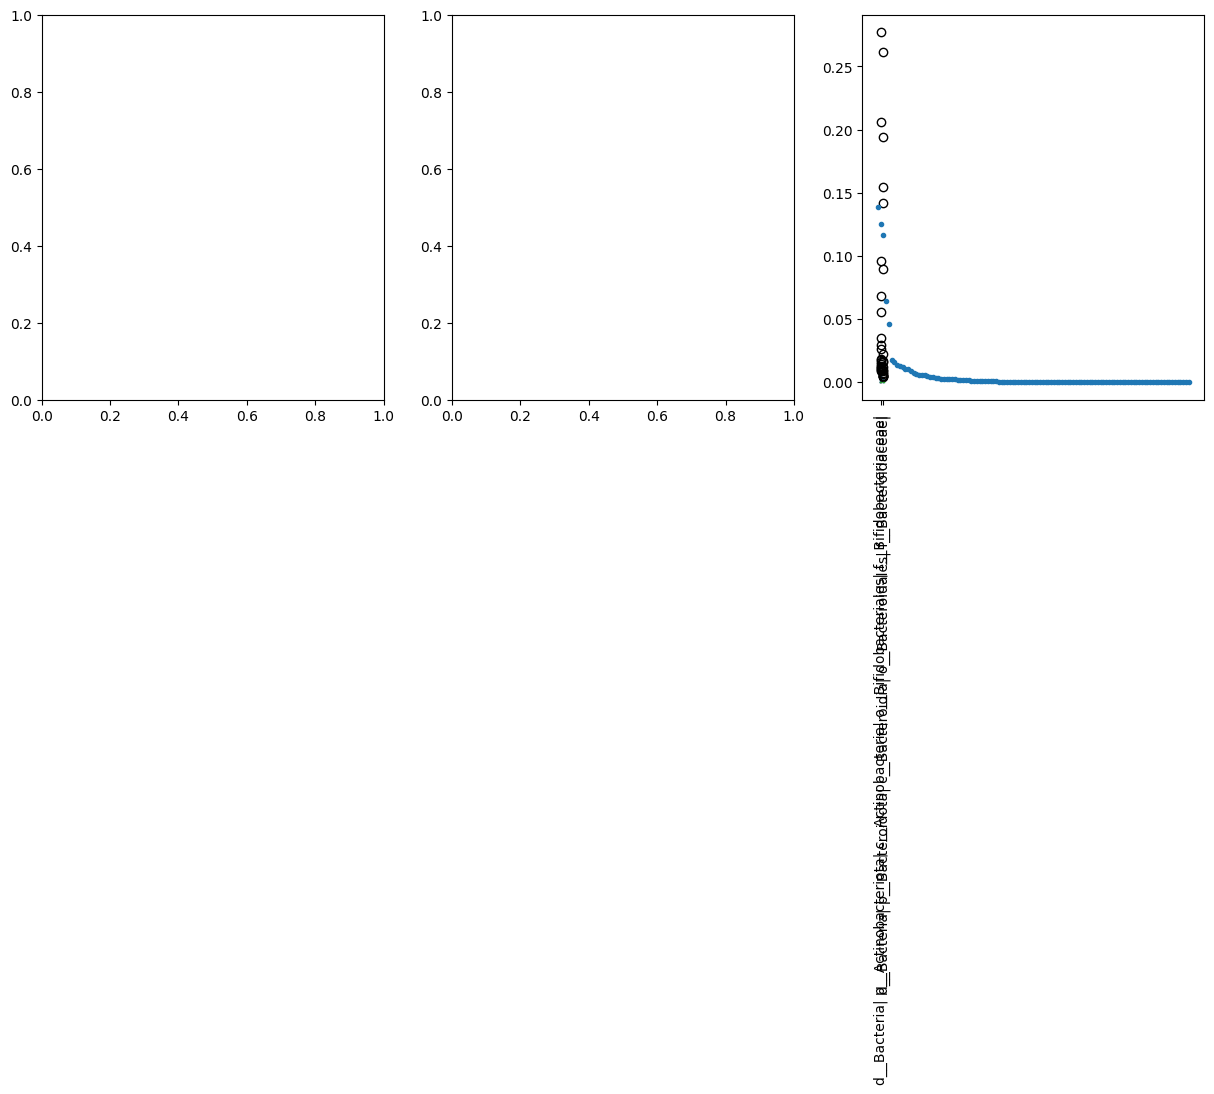

In [32]:
mean_values = dataset.groupby('label').mean()
diff_mean_proportion = (mean_values.iloc[0] - mean_values.iloc[1]).abs()
diff_mean_proportion = diff_mean_proportion.sort_values(ascending=False)

diff_mean_proportion.plot(rot=90, marker='.', linestyle='')
plt.show()

In [33]:
# Print de n most varying on average between label 1 and 0 individuals
diff_mean_proportion.head(5)

d__Bacteria| p__Bacteroidota| c__Bacteroidia| o__Bacteroidales| f__Prevotellaceae|                      0.138938
d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Bifidobacteriales| f__Bifidobacteriaceae|       0.125401
d__Bacteria| p__Bacteroidota| c__Bacteroidia| o__Bacteroidales| f__Bacteroidaceae|                      0.116197
d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Enterobacteriaceae|     0.063945
d__Bacteria| p__Firmicutes| c__Clostridia| o__Oscillospirales| f__Ruminococcaceae|                      0.045886
dtype: float64

In [34]:
# What proportion of bacteria are not changing much on average at threshold 0.001% ?
diff_mean_proportion[diff_mean_proportion < 0.001].count() / diff_mean_proportion.count()

0.6842105263157895

As we look into the variation in composition of the microbiota of label 1 and 0 individuals, it seems that some bacteria can vary by a significant amount. Note though that most of the composition is left almost unchanged.

Now, we look into a possible correlation between the microbiota composition and the associated label of the individual.

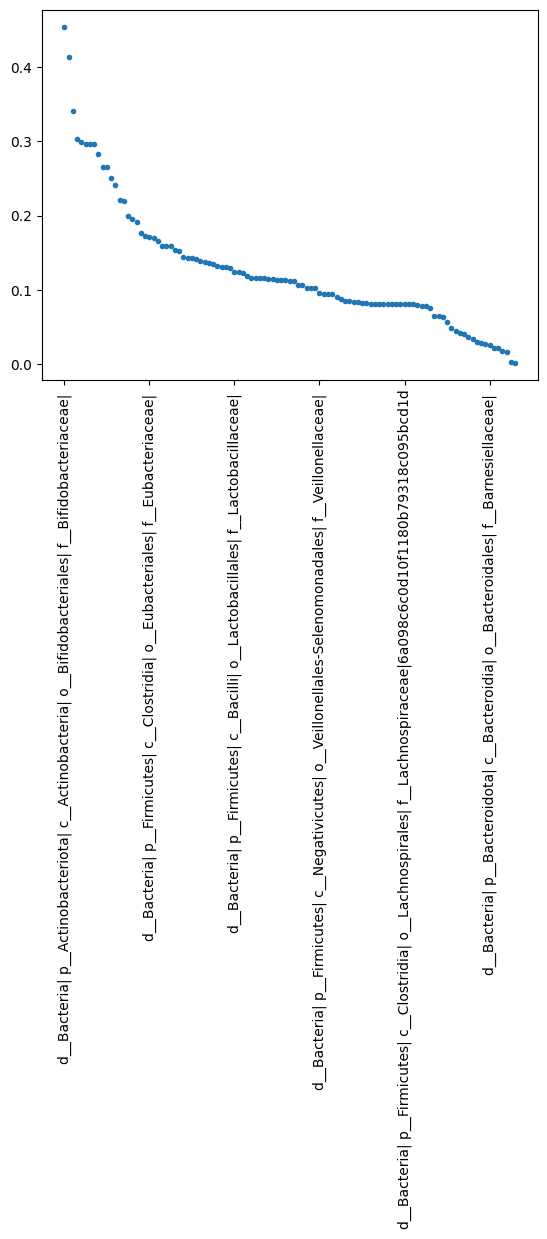

In [35]:
correlation_with_label = dataset.corr()['label'].abs().sort_values(ascending=False)
correlation_with_label = correlation_with_label.drop(correlation_with_label.index[0])
correlation_with_label.plot(rot=90, marker='.', linestyle='')
plt.show()

As it seems, there exists a direct absolute correlation between some bacteria and the associated label. Some seem to be way less impacting than others in the result, but most of them seems to play an informative role.

Looking at the correlation between the different features, we can obtain the following correlation matrix.

In [36]:
X.corr()

,d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Actinomycetales| f__Actinomycetaceae|,d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Bifidobacteriales| f__Bifidobacteriaceae|,d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Corynebacteriales| f__Corynebacteriaceae|,d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Corynebacteriales| f__Dietziaceae|,d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Micrococcales| f__Microbacteriaceae|,d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Micrococcales| f__Micrococcaceae|,d__Bacteria| p__Actinobacteriota| c__Coriobacteriia| o__Coriobacteriales| f__Atopobiaceae|,d__Bacteria| p__Actinobacteriota| c__Coriobacteriia| o__Coriobacteriales| f__Coriobacteriaceae|,d__Bacteria| p__Actinobacteriota| c__Coriobacteriia| o__Coriobacteriales| f__Coriobacteriales_Incertae_Sedis|,d__Bacteria| p__Actinobacteriota| c__Coriobacteriia| o__Coriobacteriales| f__Eggerthellaceae|,...,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Burkholderiales| f__Oxalobacteraceae|,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Burkholderiales| f__Sutterellaceae|,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Cardiobacteriales| f__Cardiobacteriaceae|,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Enterobacteriaceae|,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Enterobacteriaceae|4404333586add1e05fe280c5eaa5bdd2,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Enterobacteriaceae|a0e658b68b3dda271e8617f5403542d3,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Enterobacteriaceae|b54e85eefc32197ad3ce0852b2967396,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Hafniaceae|,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Pasteurellales| f__Pasteurellaceae|,d__Bacteria| p__Spirochaetota| c__Spirochaetia| o__Spirochaetales| f__Spirochaetaceae|
d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Actinomycetales| f__Actinomycetaceae|,1.000000,-0.052262,0.722172,-0.000525,-0.008397,0.023300,-0.043249,-0.024554,-0.079711,-0.215513,...,-0.010366,0.154117,NaN,0.065854,-0.043086,-0.027315,0.044762,-0.010026,0.032110,0.947633
d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Bifidobacteriales| f__Bifidobacteriaceae|,-0.052262,1.000000,-0.077034,-0.094645,-0.063129,-0.141762,0.183449,0.390694,0.015444,-0.171119,...,0.123569,-0.061009,NaN,-0.090034,-0.076256,-0.085185,-0.104015,-0.098381,-0.124039,-0.026560
d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Corynebacteriales| f__Corynebacteriaceae|,0.722172,-0.077034,1.000000,-0.105767,-0.069572,-0.091301,-0.043937,-0.065402,0.011877,0.056542,...,-0.059826,-0.038172,NaN,-0.069943,-0.043771,-0.048849,-0.058736,0.467915,-0.046785,0.779858
d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Corynebacteriales| f__Dietziaceae|,-0.000525,-0.094645,-0.105767,1.000000,0.283547,0.333144,-0.111233,-0.089399,-0.116980,-0.161221,...,0.232866,0.012390,NaN,0.284387,-0.077240,0.011624,0.521251,-0.018844,0.483556,-0.106856
d__Bacteria| p__Actinobacteriota| c__Actinobacteria| o__Micrococcales| f__Microbacteriaceae|,-0.008397,-0.063129,-0.069572,0.283547,1.000000,0.121554,-0.042165,-0.105500,-0.018927,-0.092522,...,0.023722,-0.088251,NaN,-0.104229,-0.042006,-0.046879,-0.056367,-0.064439,-0.050986,-0.040354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Enterobacteriaceae|a0e658b68b3dda271e8617f5403542d3,-0.027315,-0.085185,-0.048849,0.011624,-0.046879,0.661112,-0.001609,-0.085901,-0.062383,-0.043705,...,0.030071,0.343407,NaN,0.271563,-0.029494,1.000000,0.663189,-0.045246,0.093986,-0.028334
d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria| o__Enterobacterales| f__Enterobacteriaceae|b54e85eefc32197ad3ce0852b2967396,0.0

## Predictive models

### Logistic regression

Recall that our goal is to predict the label of each individual given their microbiota structure. We perform some rudimentary preprocessing:
- rescaling in $[0,1]$
- standardization
- adding column of 1 for bias

First, we try the simplest model possible: the logistic regression.

In [37]:
# Standardization
# X = (X - X.mean())/X.std()
# Min/Max scaling
# X = (X - X.min())/(X.max() - X.min())
# Adding a constant column for bias
X['constant'] = 1

print(np.isnan(X.values).any())

False


In [38]:
from sklearn.model_selection import StratifiedShuffleSplit
# Building training and test sets in a stratified fashion so we keep a similar distribution of labels

n_folds = 5
stratifier = StratifiedShuffleSplit(n_splits=n_folds, test_size=0.30)
for i, (train_index, test_index) in enumerate(stratifier.split(X, y)):
    continue

X_train, y_train = X.values[train_index], y.values[train_index]
X_test, y_test = X.values[test_index], y.values[test_index]

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, f1_score
from src.utils.functions import accuracy

logistic_reg = LogisticRegression(
    penalty='l2',
)
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)
print("Logistic regression metrics:")
print("Accuracy:", logistic_reg.score(X_test, y_test))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Logistic regression metrics:
Accuracy: 0.7692307692307693
Balanced Accuracy: 0.5
Confusion matrix:
 [[10  0]
 [ 3  0]]


In [40]:
def evaluate(model, predict_fun, training_steps=0):
    size = n_folds
    mean_accuracy = np.zeros(size)
    mean_balanced_accuracy = np.zeros(size)
    mean_f1 = np.zeros(size)
    mean_cm = 0
    for i, (train_index, test_index) in enumerate(stratifier.split(X, y)):
        print("* Fold", i)
        X_train_fold, y_train_fold = X.values[train_index], y.values[train_index]
        X_test_fold, y_test_fold = X.values[test_index], y.values[test_index]
        model.fit(X_train_fold, y_train_fold)
        if training_steps > 0:
            model.train(training_steps, 1)
        y_pred = predict_fun(X_test_fold)
        print("     Accuracy:", accuracy(y_test_fold, y_pred))
        print("     Balanced Accuracy:", balanced_accuracy_score(y_test_fold, y_pred))
        print("     F1 score:", f1_score(y_test_fold, y_pred))
        print("     Confusion matrix:\n", confusion_matrix(y_test_fold, y_pred))

        mean_accuracy[i] = accuracy(y_test_fold, y_pred)
        mean_balanced_accuracy[i] = balanced_accuracy_score(y_test_fold, y_pred)
        mean_f1[i] = f1_score(y_test_fold, y_pred)
        mean_cm += confusion_matrix(y_test_fold, y_pred)

    print("[Summary]")
    print("     Accuracy:", mean_accuracy.mean(), "±", mean_accuracy.std())
    print("     Balanced Accuracy:", mean_balanced_accuracy.mean(), "±", mean_balanced_accuracy.std())
    print("     F1 score:", mean_f1.mean(), "±", mean_f1.std())
    print("     (sum) Confusion matrix:\n", mean_cm)
    return mean_accuracy, mean_balanced_accuracy, mean_f1, mean_cm

_ = evaluate(logistic_reg, logistic_reg.predict)

* Fold 0
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 1
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 2
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 3
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 4
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
[Summary]
     Accuracy: 0.7692307692307693 ± 0.0
     Balanced Accuracy: 0.5 ± 0.0
     F1 score: 0.0 ± 0.0
     (sum) Confusion matrix:
 [[50  0]
 [15  0]]


### Latent model with logistic regression

In this section, we aim at potentially improving the previous results by introducing a latent variable model in our logistic regression.

The model is the following:
- $Z_i \sim \mathcal{B}(\pi)$
- $p_{\theta}(X_i | Z_i) \sim \mathcal{N}(\mu, \Sigma)$
- $\mathbb{P}(Y_i = 1 | X_i, Z_i = k) = \sigma(W_{e,k} e_k + W_{x,k} X_i)$

First, we try to determine a relevant space for $Z$.

In [41]:
from sklearn.mixture import GaussianMixture

n_component_list = [1, 2, 3, 5, 8, 10, 15, 20]
bic = np.zeros(len(n_component_list))
aic = np.zeros(len(n_component_list))

X_tild_train = np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1)
X_tild_test = np.concatenate((X_test, y_test.reshape(-1, 1)), axis=1)
for i, n_component in enumerate(n_component_list):
    gmm = GaussianMixture(n_components=n_component, random_state=0)
    gmm.fit(X_tild_train)
    bic[i] = gmm.bic(X_tild_test)
    aic[i] = gmm.aic(X_tild_test)

C:\Users\frigi\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\frigi\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\frigi\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\frigi\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmea

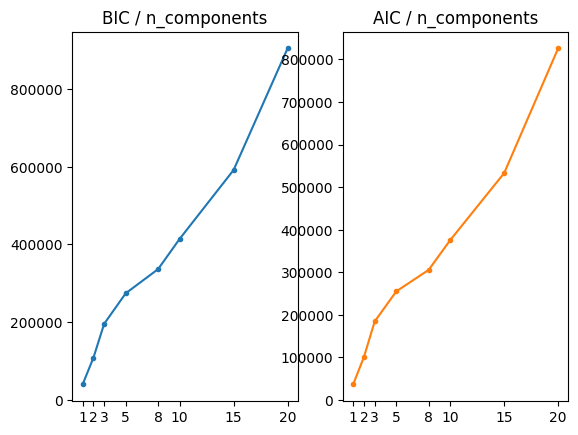

In [42]:
fig, axs = plt.subplots(1, 2)
axs[0].set_title("BIC / n_components")
axs[0].plot(n_component_list, bic, marker='.', color='C0')
axs[1].set_title("AIC / n_components")
axs[1].plot(n_component_list, aic, marker='.', color='C1')
for ax in axs:
    ax.set_xticks(n_component_list)
plt.show()

In [43]:
from src.model import GaussianMixtureClassifier
from src.utils.optimizers import GradientDescent

gmm_classif = GaussianMixtureClassifier(
    z_dim=1,
    optimizer=GradientDescent(learning_rate=0.01, n_iter=100),
    seed=1
)
gmm_classif.fit(X_train, y_train)
gmm_classif.train(20)
y_pred = gmm_classif.classify(X_test)
print("Latent Gaussian Mixture Logistic regression metrics:")
print("Accuracy:", accuracy(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

[!] One gaussian has been set to 0.
Latent Gaussian Mixture Logistic regression metrics:
Accuracy: 0.7692307692307693
Balanced Accuracy: 0.5
Confusion matrix:
 [[10  0]
 [ 3  0]]


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))
C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:135: RuntimeWarning: invalid value encountered in subtract
  log_t_i -= logsumexp(log_t_i)


In [44]:
_ = evaluate(gmm_classif, gmm_classif.classify)

* Fold 0
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 1
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 2
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 3
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 4
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
[Summary]
     Accuracy: 0.7692307692307693 ± 0.0
     Balanced Accuracy: 0.5 ± 0.0
     F1 score: 0.0 ± 0.0
     (sum) Confusion matrix:
 [[50  0]
 [15  0]]


[*] Z dim: 1
* Fold 0
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 1
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 2
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 3
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 4


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))
C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:135: RuntimeWarning: invalid value encountered in subtract
  log_t_i -= logsumexp(log_t_i)
C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))
C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:135: RuntimeWarning: invalid value encountered in subtract
  log_t_i -= logsumexp(log_t_i)
C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\mo

[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
[Summary]
     Accuracy: 0.7692307692307693 ± 0.0
     Balanced Accuracy: 0.5 ± 0.0
     F1 score: 0.0 ± 0.0
     (sum) Confusion matrix:
 [[50  0]
 [15  0]]
[*] Z dim: 2
* Fold 0
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 1


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))
C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:135: RuntimeWarning: invalid value encountered in subtract
  log_t_i -= logsumexp(log_t_i)
C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 2
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))
C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 4
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
[Summary]
     Accuracy: 0.7692307692307693 ± 0.0
     Balanced Accuracy: 0.5 ± 0.0
     F1 score: 0.0 ± 0.0
     (sum) Confusion matrix:
 [[50  0]
 [15  0]]
[*] Z dim: 3
* Fold 0


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))
C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.23076923076923078
     Balanced Accuracy: 0.26666666666666666
     F1 score: 0.16666666666666666
     Confusion matrix:
 [[2 8]
 [2 1]]
* Fold 1
[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))
C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.41666666666666663
     F1 score: 0.2222222222222222
     Confusion matrix:
 [[5 5]
 [2 1]]
* Fold 2
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.41666666666666663
     F1 score: 0.2222222222222222
     Confusion matrix:
 [[5 5]
 [2 1]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.5333333333333333
     F1 score: 0.36363636363636365
     Confusion matrix:
 [[4 6]
 [1 2]]
* Fold 4
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.5333333333333333
     F1 score: 0.36363636363636365
     Confusion matrix:
 [[4 6]
 [1 2]]
[Summary]
     Accuracy: 0.4153846153846154 ± 0.09230769230769231
     Balanced Accuracy: 0.4333333333333333 ± 0.09831920802501751
     F1 score: 0.2676767676767676 ± 0.08093424494549549
     (sum) Confusion matrix:
 [[20 30]
 [ 8  7]]
[*] Z dim: 4
* Fold 0


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))
C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.5333333333333333
     F1 score: 0.36363636363636365
     Confusion matrix:
 [[4 6]
 [1 2]]
* Fold 1


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.38461538461538464
     Balanced Accuracy: 0.25
     F1 score: 0.0
     Confusion matrix:
 [[5 5]
 [3 0]]
* Fold 2


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.23076923076923078
     Balanced Accuracy: 0.15
     F1 score: 0.0
     Confusion matrix:
 [[3 7]
 [3 0]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.85
     F1 score: 0.6666666666666666
     Confusion matrix:
 [[7 3]
 [0 3]]
* Fold 4


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.5333333333333333
     F1 score: 0.36363636363636365
     Confusion matrix:
 [[4 6]
 [1 2]]
[Summary]
     Accuracy: 0.46153846153846156 ± 0.17541160386140583
     Balanced Accuracy: 0.46333333333333326 ± 0.24617067250182342
     F1 score: 0.2787878787878788 ± 0.2530983396099527
     (sum) Confusion matrix:
 [[23 27]
 [ 8  7]]
[*] Z dim: 5
* Fold 0


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6153846153846154
     Balanced Accuracy: 0.5166666666666666
     F1 score: 0.28571428571428575
     Confusion matrix:
 [[7 3]
 [2 1]]
* Fold 1


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6153846153846154
     Balanced Accuracy: 0.6333333333333333
     F1 score: 0.4444444444444444
     Confusion matrix:
 [[6 4]
 [1 2]]
* Fold 2


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.41666666666666663
     F1 score: 0.2222222222222222
     Confusion matrix:
 [[5 5]
 [2 1]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.7333333333333334
     F1 score: 0.5714285714285715
     Confusion matrix:
 [[8 2]
 [1 2]]
* Fold 4


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.5333333333333333
     F1 score: 0.36363636363636365
     Confusion matrix:
 [[4 6]
 [1 2]]
[Summary]
     Accuracy: 0.5846153846153846 ± 0.11512791959304437
     Balanced Accuracy: 0.5666666666666667 ± 0.10801234497346437
     F1 score: 0.3774891774891775 ± 0.12232567588567414
     (sum) Confusion matrix:
 [[30 20]
 [ 7  8]]
[*] Z dim: 6
* Fold 0


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.5833333333333333
     F1 score: 0.4
     Confusion matrix:
 [[5 5]
 [1 2]]
* Fold 1


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.5333333333333333
     F1 score: 0.36363636363636365
     Confusion matrix:
 [[4 6]
 [1 2]]
* Fold 2


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6153846153846154
     Balanced Accuracy: 0.75
     F1 score: 0.5454545454545454
     Confusion matrix:
 [[5 5]
 [0 3]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.5833333333333333
     F1 score: 0.4
     Confusion matrix:
 [[5 5]
 [1 2]]
* Fold 4


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.38461538461538464
     Balanced Accuracy: 0.3666666666666667
     F1 score: 0.2
     Confusion matrix:
 [[4 6]
 [2 1]]
[Summary]
     Accuracy: 0.5076923076923077 ± 0.0784464540552736
     Balanced Accuracy: 0.5633333333333334 ± 0.12265579661982731
     F1 score: 0.3818181818181818 ± 0.11029637009529528
     (sum) Confusion matrix:
 [[23 27]
 [ 5 10]]
[*] Z dim: 7
* Fold 0


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6923076923076923
     Balanced Accuracy: 0.5666666666666667
     F1 score: 0.3333333333333333
     Confusion matrix:
 [[8 2]
 [2 1]]
* Fold 1


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6153846153846154
     Balanced Accuracy: 0.5166666666666666
     F1 score: 0.28571428571428575
     Confusion matrix:
 [[7 3]
 [2 1]]
* Fold 2


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.38461538461538464
     Balanced Accuracy: 0.3666666666666667
     F1 score: 0.2
     Confusion matrix:
 [[4 6]
 [2 1]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6923076923076923
     Balanced Accuracy: 0.6833333333333333
     F1 score: 0.5
     Confusion matrix:
 [[7 3]
 [1 2]]
* Fold 4


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.3076923076923077
     Balanced Accuracy: 0.43333333333333335
     F1 score: 0.30769230769230765
     Confusion matrix:
 [[2 8]
 [1 2]]
[Summary]
     Accuracy: 0.5384615384615385 ± 0.16135520741079254
     Balanced Accuracy: 0.5133333333333333 ± 0.10923979738782626
     F1 score: 0.32534798534798537 ± 0.09814454904414091
     (sum) Confusion matrix:
 [[28 22]
 [ 8  7]]
[*] Z dim: 8
* Fold 0


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.3
     F1 score: 0.0
     Confusion matrix:
 [[6 4]
 [3 0]]
* Fold 1


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.23076923076923078
     Balanced Accuracy: 0.15
     F1 score: 0.0
     Confusion matrix:
 [[3 7]
 [3 0]]
* Fold 2


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.5833333333333333
     F1 score: 0.4
     Confusion matrix:
 [[5 5]
 [1 2]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.38461538461538464
     Balanced Accuracy: 0.3666666666666667
     F1 score: 0.2
     Confusion matrix:
 [[4 6]
 [2 1]]
* Fold 4


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.38461538461538464
     Balanced Accuracy: 0.3666666666666667
     F1 score: 0.2
     Confusion matrix:
 [[4 6]
 [2 1]]
[Summary]
     Accuracy: 0.4 ± 0.10204999354939691
     Balanced Accuracy: 0.35333333333333333 ± 0.13960261060914614
     F1 score: 0.16 ± 0.14966629547095767
     (sum) Confusion matrix:
 [[22 28]
 [11  4]]
[*] Z dim: 9
* Fold 0


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.5833333333333333
     F1 score: 0.4
     Confusion matrix:
 [[5 5]
 [1 2]]
* Fold 1


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6923076923076923
     Balanced Accuracy: 0.45
     F1 score: 0.0
     Confusion matrix:
 [[9 1]
 [3 0]]
* Fold 2


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6923076923076923
     Balanced Accuracy: 0.5666666666666667
     F1 score: 0.3333333333333333
     Confusion matrix:
 [[8 2]
 [2 1]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6153846153846154
     Balanced Accuracy: 0.6333333333333333
     F1 score: 0.4444444444444444
     Confusion matrix:
 [[6 4]
 [1 2]]
* Fold 4


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.5333333333333333
     F1 score: 0.36363636363636365
     Confusion matrix:
 [[4 6]
 [1 2]]
[Summary]
     Accuracy: 0.6 ± 0.08970695222838923
     Balanced Accuracy: 0.5533333333333333 ± 0.06091888960832353
     F1 score: 0.30828282828282827 ± 0.15854454843798363
     (sum) Confusion matrix:
 [[32 18]
 [ 8  7]]
[*] Z dim: 10
* Fold 0
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.5833333333333333
     F1 score: 0.4
     Confusion matrix:
 [[5 5]
 [1 2]]
* Fold 1


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.3
     F1 score: 0.0
     Confusion matrix:
 [[6 4]
 [3 0]]
* Fold 2


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.38461538461538464
     Balanced Accuracy: 0.3666666666666667
     F1 score: 0.2
     Confusion matrix:
 [[4 6]
 [2 1]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.3076923076923077
     Balanced Accuracy: 0.43333333333333335
     F1 score: 0.30769230769230765
     Confusion matrix:
 [[2 8]
 [1 2]]
* Fold 4


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6153846153846154
     Balanced Accuracy: 0.6333333333333333
     F1 score: 0.4444444444444444
     Confusion matrix:
 [[6 4]
 [1 2]]
[Summary]
     Accuracy: 0.4615384615384615 ± 0.10878565864408424
     Balanced Accuracy: 0.46333333333333326 ± 0.12666666666666665
     F1 score: 0.27042735042735044 ± 0.15909158438758705
     (sum) Confusion matrix:
 [[23 27]
 [ 8  7]]
[*] Z dim: 11
* Fold 0


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.5333333333333333
     F1 score: 0.36363636363636365
     Confusion matrix:
 [[4 6]
 [1 2]]
* Fold 1
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6153846153846154
     Balanced Accuracy: 0.6333333333333333
     F1 score: 0.4444444444444444
     Confusion matrix:
 [[6 4]
 [1 2]]
* Fold 2


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6153846153846154
     Balanced Accuracy: 0.75
     F1 score: 0.5454545454545454
     Confusion matrix:
 [[5 5]
 [0 3]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.4666666666666667
     F1 score: 0.25
     Confusion matrix:
 [[6 4]
 [2 1]]
* Fold 4


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6923076923076923
     Balanced Accuracy: 0.8
     F1 score: 0.6
     Confusion matrix:
 [[6 4]
 [0 3]]
[Summary]
     Accuracy: 0.5846153846153846 ± 0.07844645405527362
     Balanced Accuracy: 0.6366666666666667 ± 0.12578641509408806
     F1 score: 0.4407070707070707 ± 0.12543469971040566
     (sum) Confusion matrix:
 [[27 23]
 [ 4 11]]
[*] Z dim: 12
* Fold 0


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6153846153846154
     Balanced Accuracy: 0.75
     F1 score: 0.5454545454545454
     Confusion matrix:
 [[5 5]
 [0 3]]
* Fold 1


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.5333333333333333
     F1 score: 0.36363636363636365
     Confusion matrix:
 [[4 6]
 [1 2]]
* Fold 2


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.38461538461538464
     Balanced Accuracy: 0.25
     F1 score: 0.0
     Confusion matrix:
 [[5 5]
 [3 0]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.4666666666666667
     F1 score: 0.25
     Confusion matrix:
 [[6 4]
 [2 1]]
* Fold 4


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.5833333333333333
     F1 score: 0.4
     Confusion matrix:
 [[5 5]
 [1 2]]
[Summary]
     Accuracy: 0.5076923076923077 ± 0.0784464540552736
     Balanced Accuracy: 0.5166666666666666 ± 0.16295875415440422
     F1 score: 0.3118181818181818 ± 0.1822630920146583
     (sum) Confusion matrix:
 [[25 25]
 [ 7  8]]
[*] Z dim: 13
* Fold 0


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.3076923076923077
     Balanced Accuracy: 0.31666666666666665
     F1 score: 0.18181818181818182
     Confusion matrix:
 [[3 7]
 [2 1]]
* Fold 1


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6923076923076923
     Balanced Accuracy: 0.8
     F1 score: 0.6
     Confusion matrix:
 [[6 4]
 [0 3]]
* Fold 2


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.5833333333333333
     F1 score: 0.4
     Confusion matrix:
 [[5 5]
 [1 2]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.15384615384615385
     Balanced Accuracy: 0.21666666666666667
     F1 score: 0.15384615384615383
     Confusion matrix:
 [[1 9]
 [2 1]]
* Fold 4


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.5333333333333333
     F1 score: 0.36363636363636365
     Confusion matrix:
 [[4 6]
 [1 2]]
[Summary]
     Accuracy: 0.43076923076923074 ± 0.185893014978378
     Balanced Accuracy: 0.48999999999999994 ± 0.20564262420249574
     F1 score: 0.33986013986013985 ± 0.16213162672522127
     (sum) Confusion matrix:
 [[19 31]
 [ 6  9]]
[*] Z dim: 14
* Fold 0


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.38461538461538464
     Balanced Accuracy: 0.4833333333333333
     F1 score: 0.3333333333333333
     Confusion matrix:
 [[3 7]
 [1 2]]
* Fold 1


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6153846153846154
     Balanced Accuracy: 0.6333333333333333
     F1 score: 0.4444444444444444
     Confusion matrix:
 [[6 4]
 [1 2]]
* Fold 2


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.23076923076923078
     Balanced Accuracy: 0.15
     F1 score: 0.0
     Confusion matrix:
 [[3 7]
 [3 0]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.65
     F1 score: 0.4615384615384615
     Confusion matrix:
 [[3 7]
 [0 3]]
* Fold 4
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6923076923076923
     Balanced Accuracy: 0.6833333333333333
     F1 score: 0.5
     Confusion matrix:
 [[7 3]
 [1 2]]
[Summary]
     Accuracy: 0.476923076923077 ± 0.16426274233894322
     Balanced Accuracy: 0.5199999999999999 ± 0.19731531449264988
     F1 score: 0.34786324786324785 ± 0.18254617537384604
     (sum) Confusion matrix:
 [[22 28]
 [ 6  9]]
[*] Z dim: 15
* Fold 0


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.3
     F1 score: 0.0
     Confusion matrix:
 [[6 4]
 [3 0]]
* Fold 1


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.5333333333333333
     F1 score: 0.36363636363636365
     Confusion matrix:
 [[4 6]
 [1 2]]
* Fold 2


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.4666666666666667
     F1 score: 0.25
     Confusion matrix:
 [[6 4]
 [2 1]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.3076923076923077
     Balanced Accuracy: 0.31666666666666665
     F1 score: 0.18181818181818182
     Confusion matrix:
 [[3 7]
 [2 1]]
* Fold 4
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.41666666666666663
     F1 score: 0.2222222222222222
     Confusion matrix:
 [[5 5]
 [2 1]]
[Summary]
     Accuracy: 0.4461538461538462 ± 0.07536891516255932
     Balanced Accuracy: 0.4066666666666666 ± 0.08856886837057616
     F1 score: 0.20353535353535354 ± 0.1183543590696372
     (sum) Confusion matrix:
 [[24 26]
 [10  5]]
[*] Z dim: 16
* Fold 0


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.4666666666666667
     F1 score: 0.25
     Confusion matrix:
 [[6 4]
 [2 1]]
* Fold 1


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.38461538461538464
     Balanced Accuracy: 0.3666666666666667
     F1 score: 0.2
     Confusion matrix:
 [[4 6]
 [2 1]]
* Fold 2


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.38461538461538464
     Balanced Accuracy: 0.4833333333333333
     F1 score: 0.3333333333333333
     Confusion matrix:
 [[3 7]
 [1 2]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.5333333333333333
     F1 score: 0.36363636363636365
     Confusion matrix:
 [[4 6]
 [1 2]]
* Fold 4
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.38461538461538464
     Balanced Accuracy: 0.4833333333333333
     F1 score: 0.3333333333333333
     Confusion matrix:
 [[3 7]
 [1 2]]
[Summary]
     Accuracy: 0.43076923076923074 ± 0.06153846153846152
     Balanced Accuracy: 0.4666666666666667 ± 0.05477225575051659
     F1 score: 0.296060606060606 ± 0.061146078984728125
     (sum) Confusion matrix:
 [[20 30]
 [ 7  8]]
[*] Z dim: 17
* Fold 0


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.35
     F1 score: 0.0
     Confusion matrix:
 [[7 3]
 [3 0]]
* Fold 1


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.38461538461538464
     Balanced Accuracy: 0.25
     F1 score: 0.0
     Confusion matrix:
 [[5 5]
 [3 0]]
* Fold 2


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.41666666666666663
     F1 score: 0.2222222222222222
     Confusion matrix:
 [[5 5]
 [2 1]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6923076923076923
     Balanced Accuracy: 0.6833333333333333
     F1 score: 0.5
     Confusion matrix:
 [[7 3]
 [1 2]]
* Fold 4


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.15384615384615385
     Balanced Accuracy: 0.1
     F1 score: 0.0
     Confusion matrix:
 [[2 8]
 [3 0]]
[Summary]
     Accuracy: 0.44615384615384607 ± 0.178089798504465
     Balanced Accuracy: 0.36 ± 0.19367785395111936
     F1 score: 0.14444444444444443 ± 0.19751543149590198
     (sum) Confusion matrix:
 [[26 24]
 [12  3]]
[*] Z dim: 18
* Fold 0


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.41666666666666663
     F1 score: 0.2222222222222222
     Confusion matrix:
 [[5 5]
 [2 1]]
* Fold 1


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.3076923076923077
     Balanced Accuracy: 0.2
     F1 score: 0.0
     Confusion matrix:
 [[4 6]
 [3 0]]
* Fold 2


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.4666666666666667
     F1 score: 0.25
     Confusion matrix:
 [[6 4]
 [2 1]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.38461538461538464
     Balanced Accuracy: 0.3666666666666667
     F1 score: 0.2
     Confusion matrix:
 [[4 6]
 [2 1]]
* Fold 4


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6153846153846154
     Balanced Accuracy: 0.75
     F1 score: 0.5454545454545454
     Confusion matrix:
 [[5 5]
 [0 3]]
[Summary]
     Accuracy: 0.4615384615384615 ± 0.10878565864408424
     Balanced Accuracy: 0.44000000000000006 ± 0.17907168024751058
     F1 score: 0.24353535353535355 ± 0.17484623822001966
     (sum) Confusion matrix:
 [[24 26]
 [ 9  6]]
[*] Z dim: 19
* Fold 0


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.38461538461538464
     Balanced Accuracy: 0.25
     F1 score: 0.0
     Confusion matrix:
 [[5 5]
 [3 0]]
* Fold 1


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.3076923076923077
     Balanced Accuracy: 0.31666666666666665
     F1 score: 0.18181818181818182
     Confusion matrix:
 [[3 7]
 [2 1]]
* Fold 2


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.4666666666666667
     F1 score: 0.25
     Confusion matrix:
 [[6 4]
 [2 1]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.41666666666666663
     F1 score: 0.2222222222222222
     Confusion matrix:
 [[5 5]
 [2 1]]
* Fold 4


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.5833333333333333
     F1 score: 0.4
     Confusion matrix:
 [[5 5]
 [1 2]]
[Summary]
     Accuracy: 0.4461538461538462 ± 0.08970695222838923
     Balanced Accuracy: 0.4066666666666666 ± 0.11623730516108462
     F1 score: 0.21080808080808078 ± 0.12863928841463676
     (sum) Confusion matrix:
 [[24 26]
 [10  5]]
[*] Z dim: 20
* Fold 0


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.4666666666666667
     F1 score: 0.25
     Confusion matrix:
 [[6 4]
 [2 1]]
* Fold 1


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.3076923076923077
     Balanced Accuracy: 0.31666666666666665
     F1 score: 0.18181818181818182
     Confusion matrix:
 [[3 7]
 [2 1]]
* Fold 2


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.35
     F1 score: 0.0
     Confusion matrix:
 [[7 3]
 [3 0]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.5333333333333333
     F1 score: 0.36363636363636365
     Confusion matrix:
 [[4 6]
 [1 2]]
* Fold 4


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.38461538461538464
     Balanced Accuracy: 0.6
     F1 score: 0.42857142857142855
     Confusion matrix:
 [[2 8]
 [0 3]]
[Summary]
     Accuracy: 0.4461538461538462 ± 0.08970695222838923
     Balanced Accuracy: 0.4533333333333333 ± 0.10718623460542352
     F1 score: 0.2448051948051948 ± 0.14954250804908636
     (sum) Confusion matrix:
 [[22 28]
 [ 8  7]]
[*] Z dim: 21
* Fold 0


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.4666666666666667
     F1 score: 0.25
     Confusion matrix:
 [[6 4]
 [2 1]]
* Fold 1


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6153846153846154
     Balanced Accuracy: 0.6333333333333333
     F1 score: 0.4444444444444444
     Confusion matrix:
 [[6 4]
 [1 2]]
* Fold 2


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.3076923076923077
     Balanced Accuracy: 0.31666666666666665
     F1 score: 0.18181818181818182
     Confusion matrix:
 [[3 7]
 [2 1]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.5833333333333333
     F1 score: 0.4
     Confusion matrix:
 [[5 5]
 [1 2]]
* Fold 4


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.3076923076923077
     Balanced Accuracy: 0.43333333333333335
     F1 score: 0.30769230769230765
     Confusion matrix:
 [[2 8]
 [1 2]]
[Summary]
     Accuracy: 0.4615384615384615 ± 0.12871692715908853
     Balanced Accuracy: 0.4866666666666667 ± 0.11224972160321822
     F1 score: 0.3167909867909868 ± 0.09589642859896524
     (sum) Confusion matrix:
 [[22 28]
 [ 7  8]]
[*] Z dim: 22
* Fold 0


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6153846153846154
     Balanced Accuracy: 0.75
     F1 score: 0.5454545454545454
     Confusion matrix:
 [[5 5]
 [0 3]]
* Fold 1


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6923076923076923
     Balanced Accuracy: 0.6833333333333333
     F1 score: 0.5
     Confusion matrix:
 [[7 3]
 [1 2]]
* Fold 2


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.38461538461538464
     Balanced Accuracy: 0.6
     F1 score: 0.42857142857142855
     Confusion matrix:
 [[2 8]
 [0 3]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.5333333333333333
     F1 score: 0.36363636363636365
     Confusion matrix:
 [[4 6]
 [1 2]]
* Fold 4


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.4666666666666667
     F1 score: 0.25
     Confusion matrix:
 [[6 4]
 [2 1]]
[Summary]
     Accuracy: 0.5384615384615384 ± 0.10878565864408422
     Balanced Accuracy: 0.6066666666666667 ± 0.10143416036468626
     F1 score: 0.41753246753246753 ± 0.10417171236444403
     (sum) Confusion matrix:
 [[24 26]
 [ 4 11]]
[*] Z dim: 23
* Fold 0


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.41666666666666663
     F1 score: 0.2222222222222222
     Confusion matrix:
 [[5 5]
 [2 1]]
* Fold 1


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.5833333333333333
     F1 score: 0.4
     Confusion matrix:
 [[5 5]
 [1 2]]
* Fold 2


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6923076923076923
     Balanced Accuracy: 0.5666666666666667
     F1 score: 0.3333333333333333
     Confusion matrix:
 [[8 2]
 [2 1]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.65
     F1 score: 0.4615384615384615
     Confusion matrix:
 [[3 7]
 [0 3]]
* Fold 4


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6153846153846154
     Balanced Accuracy: 0.6333333333333333
     F1 score: 0.4444444444444444
     Confusion matrix:
 [[6 4]
 [1 2]]
[Summary]
     Accuracy: 0.5538461538461539 ± 0.08970695222838923
     Balanced Accuracy: 0.57 ± 0.08259674462242579
     F1 score: 0.3723076923076923 ± 0.08715199834762044
     (sum) Confusion matrix:
 [[27 23]
 [ 6  9]]
[*] Z dim: 24
* Fold 0


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.5833333333333333
     F1 score: 0.4
     Confusion matrix:
 [[5 5]
 [1 2]]
* Fold 1
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6153846153846154
     Balanced Accuracy: 0.75


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     F1 score: 0.5454545454545454
     Confusion matrix:
 [[5 5]
 [0 3]]
* Fold 2
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.38461538461538464


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Balanced Accuracy: 0.3666666666666667
     F1 score: 0.2
     Confusion matrix:
 [[4 6]
 [2 1]]
* Fold 3
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.3076923076923077
     Balanced Accuracy: 0.43333333333333335
     F1 score: 0.30769230769230765
     Confusion matrix:
 [[2 8]
 [1 2]]
* Fold 4


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.3076923076923077
     Balanced Accuracy: 0.31666666666666665
     F1 score: 0.18181818181818182
     Confusion matrix:
 [[3 7]
 [2 1]]
[Summary]
     Accuracy: 0.43076923076923074 ± 0.12498520622516862
     Balanced Accuracy: 0.49000000000000005 ± 0.15797327481430382
     F1 score: 0.32699300699300704 ± 0.13463352888346078
     (sum) Confusion matrix:
 [[19 31]
 [ 6  9]]
[*] Z dim: 25
* Fold 0


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.38461538461538464
     Balanced Accuracy: 0.4833333333333333


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     F1 score: 0.3333333333333333
     Confusion matrix:
 [[3 7]
 [1 2]]
* Fold 1
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.6923076923076923
     Balanced Accuracy: 0.6833333333333333
     F1 score: 0.5
     Confusion matrix:
 [[7 3]
 [1 2]]
* Fold 2


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.38461538461538464
     Balanced Accuracy: 0.6
     F1 score: 0.42857142857142855
     Confusion matrix:
 [[2 8]
 [0 3]]
* Fold 3
[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.4666666666666667
     F1 score: 0.25
     Confusion matrix:
 [[6 4]
 [2 1]]
* Fold 4
[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.3
     F1 score: 0.0
     Confusion matrix:
 [[6 4]
 [3 0]]
[Summary]
     Accuracy: 0.49230769230769234 ± 0.11512791959304433
     Balanced Accuracy: 0.5066666666666666 ± 0.13021349989749742
     F1 score: 0.30238095238095236 ± 0.1732705276062881
     (sum) Confusion matrix:
 [[24 26]
 [ 7  8]]
[*] Z dim: 26
* Fold 0
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.41666666666666663
     F1 score: 0.2222222222222222
     Confusion matrix:
 [[5 5]
 [2 1]]
* Fold 1


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.85
     F1 score: 0.6666666666666666
     Confusion matrix:
 [[7 3]
 [0 3]]
* Fold 2
[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.38461538461538464
     Balanced Accuracy: 0.3666666666666667
     F1 score: 0.2
     Confusion matrix:
 [[4 6]
 [2 1]]
* Fold 3
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.35
     F1 score: 0.0
     Confusion matrix:
 [[7 3]
 [3 0]]
* Fold 4


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.07692307692307693
     Balanced Accuracy: 0.05
     F1 score: 0.0
     Confusion matrix:
 [[1 9]
 [3 0]]
[Summary]
     Accuracy: 0.4461538461538462 ± 0.22505752058965836
     Balanced Accuracy: 0.4066666666666666 ± 0.2563851269737255
     F1 score: 0.21777777777777776 ± 0.24359448188523947
     (sum) Confusion matrix:
 [[24 26]
 [10  5]]
[*] Z dim: 27
* Fold 0
[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.6153846153846154
     Balanced Accuracy: 0.6333333333333333
     F1 score: 0.4444444444444444
     Confusion matrix:
 [[6 4]
 [1 2]]
* Fold 1
[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.3
     F1 score: 0.0
     Confusion matrix:
 [[6 4]
 [3 0]]
* Fold 2
[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.6153846153846154
     Balanced Accuracy: 0.5166666666666666
     F1 score: 0.28571428571428575
     Confusion matrix:
 [[7 3]
 [2 1]]
* Fold 3


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.38461538461538464
     Balanced Accuracy: 0.3666666666666667
     F1 score: 0.2
     Confusion matrix:
 [[4 6]
 [2 1]]
* Fold 4
[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.6153846153846154
     Balanced Accuracy: 0.4
     F1 score: 0.0
     Confusion matrix:
 [[8 2]
 [3 0]]
[Summary]
     Accuracy: 0.5384615384615385 ± 0.09730085108210398
     Balanced Accuracy: 0.44333333333333336 ± 0.11813363431112898
     F1 score: 0.18603174603174605 ± 0.17095289678777315
     (sum) Confusion matrix:
 [[31 19]
 [11  4]]
[*] Z dim: 28
* Fold 0
[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.5384615384615384
     Balanced Accuracy: 0.4666666666666667
     F1 score: 0.25
     Confusion matrix:
 [[6 4]
 [2 1]]
* Fold 1
[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.41666666666666663
     F1 score: 0.2222222222222222
     Confusion matrix:
 [[5 5]
 [2 1]]
* Fold 2
[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.23076923076923078
     Balanced Accuracy: 0.15
     F1 score: 0.0
     Confusion matrix:
 [[3 7]
 [3 0]]
* Fold 3
[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.6153846153846154
     Balanced Accuracy: 0.75
     F1 score: 0.5454545454545454
     Confusion matrix:
 [[5 5]
 [0 3]]
* Fold 4
[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.23076923076923078
     Balanced Accuracy: 0.26666666666666666
     F1 score: 0.16666666666666666
     Confusion matrix:
 [[2 8]
 [2 1]]
[Summary]
     Accuracy: 0.4153846153846154 ± 0.15839430986133848
     Balanced Accuracy: 0.41 ± 0.20346989949375807
     F1 score: 0.2368686868686869 ± 0.17700128863356057
     (sum) Confusion matrix:
 [[21 29]
 [ 9  6]]
[*] Z dim: 29
* Fold 0
[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.6923076923076923
     Balanced Accuracy: 0.6833333333333333
     F1 score: 0.5
     Confusion matrix:
 [[7 3]
 [1 2]]
* Fold 1
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.46153846153846156
     Balanced Accuracy: 0.5333333333333333
     F1 score: 0.36363636363636365
     Confusion matrix:
 [[4 6]
 [1 2]]
* Fold 2


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.5384615384615384


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Balanced Accuracy: 0.4666666666666667
     F1 score: 0.25
     Confusion matrix:
 [[6 4]
 [2 1]]
* Fold 3
[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.3076923076923077
     Balanced Accuracy: 0.31666666666666665
     F1 score: 0.18181818181818182
     Confusion matrix:
 [[3 7]
 [2 1]]
* Fold 4
[!] One gaussian has been set to 0.
[*] EM (0/20): 


C:\Users\frigi\Desktop\Code\Stage-Microbiote\Expectation-Maximization\src\model\EM\gaussian_mixture_classifier.py:133: RuntimeWarning: divide by zero encountered in log
  log_t_i[l] = np.log(self.pi[l]) + np.log(self.p_cond(x_i, self.mu[l], self.sigma[l]))


     Accuracy: 0.3076923076923077
     Balanced Accuracy: 0.31666666666666665
     F1 score: 0.18181818181818182
     Confusion matrix:
 [[3 7]
 [2 1]]
[Summary]
     Accuracy: 0.4615384615384615 ± 0.14595127662315596
     Balanced Accuracy: 0.46333333333333326 ± 0.13880441875771343
     F1 score: 0.2954545454545455 ± 0.12196734422726126
     (sum) Confusion matrix:
 [[23 27]
 [ 8  7]]


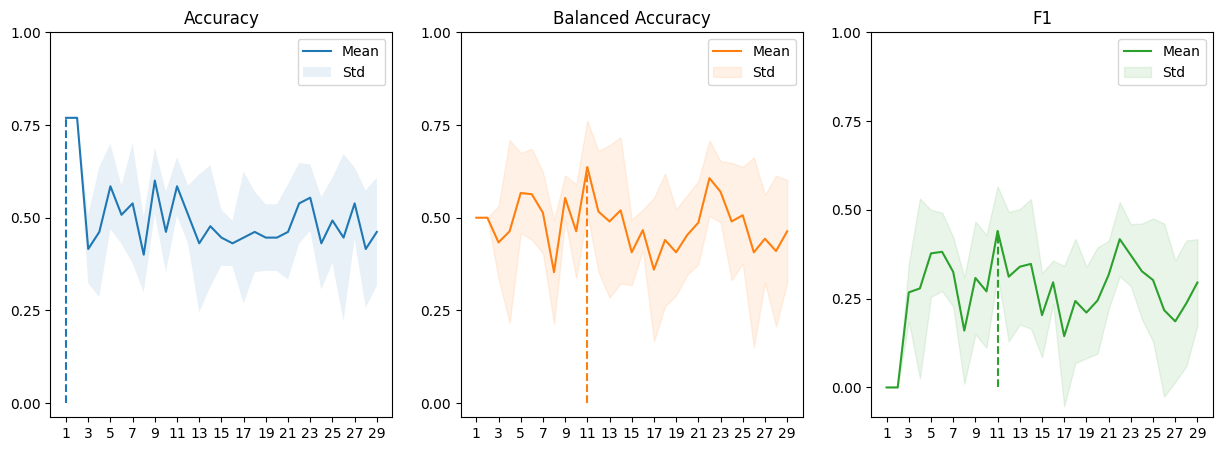

In [45]:
z_dims = np.arange(1, 30)

accuracies = np.zeros((len(z_dims), 3))
balanced_accuracies = np.zeros((len(z_dims), 3))
f1_scores = np.zeros((len(z_dims), 3))


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, z_dim in enumerate(z_dims):
    print("[*] Z dim:", z_dim)
    gmm_classif = GaussianMixtureClassifier(
        z_dim=z_dim,
        optimizer=GradientDescent(learning_rate=0.01, n_iter=100),
        seed=0
    )
    mean_accuracy, mean_balanced_accuracy, mean_f1, mean_cm = evaluate(gmm_classif, gmm_classif.classify, training_steps=20)
    accuracies[i] = np.array([mean_accuracy.mean(), mean_accuracy.mean()-mean_accuracy.std(), mean_accuracy.mean()+mean_accuracy.std()])
    balanced_accuracies[i] = np.array([mean_balanced_accuracy.mean(), mean_balanced_accuracy.mean()-mean_balanced_accuracy.std(),  mean_balanced_accuracy.mean()+mean_balanced_accuracy.std()])
    f1_scores[i] = np.array([mean_f1.mean(), mean_f1.mean()-mean_f1.std(), mean_f1.mean()+mean_f1.std()])

axs[0].plot(z_dims, accuracies[:, 0], color='C0', label="Mean")
axs[1].plot(z_dims, balanced_accuracies[:, 0], color='C1', label="Mean")
axs[2].plot(z_dims, f1_scores[:, 0], color='C2', label="Mean")
axs[0].fill_between(z_dims, accuracies[:, 1], accuracies[:, 2], alpha=0.1, label="Std")
axs[1].fill_between(z_dims, balanced_accuracies[:, 1], balanced_accuracies[:, 2], color="C1", alpha=0.1, label="Std")
axs[2].fill_between(z_dims, f1_scores[:, 1], f1_scores[:, 2], alpha=0.1, color="C2", label="Std")
axs[0].vlines(x=np.argmax(accuracies[:, 0])+1, ymin=0, ymax=accuracies[:, 0].max(), color='C0', linestyles='--')
axs[1].vlines(x=np.argmax(balanced_accuracies[:, 0])+1, ymin=0, ymax=balanced_accuracies[:, 0].max(), color='C1', linestyles='--')
axs[2].vlines(x=np.argmax(f1_scores[:, 0])+1, ymin=0, ymax=f1_scores[:, 0].max(), color='C2', linestyles='--')
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[0].set_xticks(z_dims[np.arange(0, len(z_dims), 2)])
axs[1].set_xticks(z_dims[np.arange(0, len(z_dims), 2)])
axs[2].set_xticks(z_dims[np.arange(0, len(z_dims), 2)])
axs[0].set_yticks(np.linspace(0, 1, 5))
axs[1].set_yticks(np.linspace(0, 1, 5))
axs[2].set_yticks(np.linspace(0, 1, 5))
axs[0].set_title("Accuracy")
axs[1].set_title("Balanced Accuracy")
axs[2].set_title("F1")
plt.show()

### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(
    n_estimators=20,
    criterion='gini',
    max_depth=None,
    max_features='sqrt',
    max_samples=3,
    class_weight={0:1, 1:1}
)
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
print("Random forest metrics:")
print("Accuracy:", randomforest.score(X_test, y_test))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Random forest metrics:
Accuracy: 0.7692307692307693
Balanced Accuracy: 0.5
Confusion matrix:
 [[10  0]
 [ 3  0]]


In [47]:
_ = evaluate(randomforest, randomforest.predict)

* Fold 0
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 1
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 2
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 3
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 4
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
[Summary]
     Accuracy: 0.7692307692307693 ± 0.0
     Balanced Accuracy: 0.5 ± 0.0
     F1 score: 0.0 ± 0.0
     (sum) Confusion matrix:
 [[50  0]
 [15  0]]


### XGBoost

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

xgboost = GradientBoostingClassifier(
    learning_rate=1.2,
    n_estimators=10,
    max_depth=1,
    random_state=0
)
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)
print("Random forest metrics:")
print("Accuracy:", xgboost.score(X_test, y_test))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Random forest metrics:
Accuracy: 0.8461538461538461
Balanced Accuracy: 0.6666666666666666
Confusion matrix:
 [[10  0]
 [ 2  1]]


In [49]:
_ = evaluate(xgboost, xgboost.predict)

* Fold 0
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.85
     F1 score: 0.6666666666666666
     Confusion matrix:
 [[7 3]
 [0 3]]
* Fold 1
     Accuracy: 0.9230769230769231
     Balanced Accuracy: 0.8333333333333333
     F1 score: 0.8
     Confusion matrix:
 [[10  0]
 [ 1  2]]
* Fold 2
     Accuracy: 0.3076923076923077
     Balanced Accuracy: 0.31666666666666665
     F1 score: 0.18181818181818182
     Confusion matrix:
 [[3 7]
 [2 1]]
* Fold 3
     Accuracy: 0.6923076923076923
     Balanced Accuracy: 0.5666666666666667
     F1 score: 0.3333333333333333
     Confusion matrix:
 [[8 2]
 [2 1]]
* Fold 4
     Accuracy: 0.6923076923076923
     Balanced Accuracy: 0.6833333333333333
     F1 score: 0.5
     Confusion matrix:
 [[7 3]
 [1 2]]
[Summary]
     Accuracy: 0.676923076923077 ± 0.2029370147426603
     Balanced Accuracy: 0.65 ± 0.19635568633364187
     F1 score: 0.4963636363636364 ± 0.22213919477416127
     (sum) Confusion matrix:
 [[35 15]
 [ 6  9]]
